# 데이터 변환 적용하기

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [4]:
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기:\n", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기:
 (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### 주성분 분석(PCA)

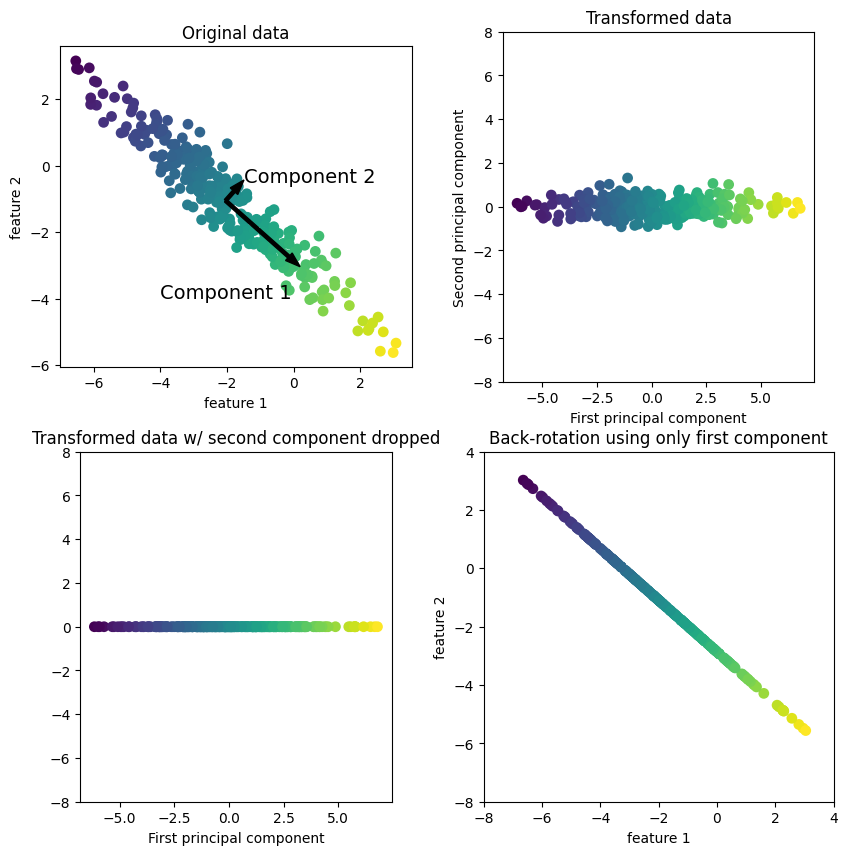

In [6]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두번째 주성분')

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/c

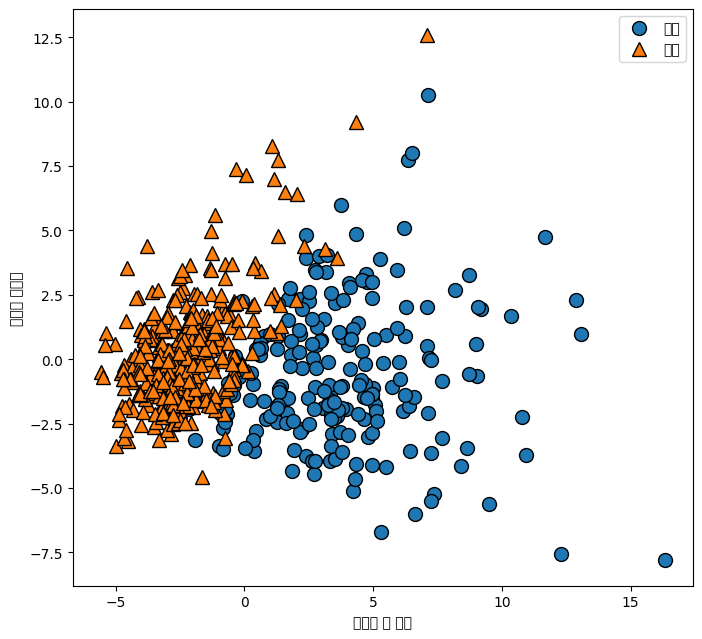

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성","양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주 성분")
plt.ylabel("두번째 주성분")

In [19]:
print("PCA 주성분 형태:", pca.components_.shape)
print("PCA 주성분:", pca.components_)

PCA 주성분 형태: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### LFW(Labeled Faces in the World) 데이터셋 특성 추출

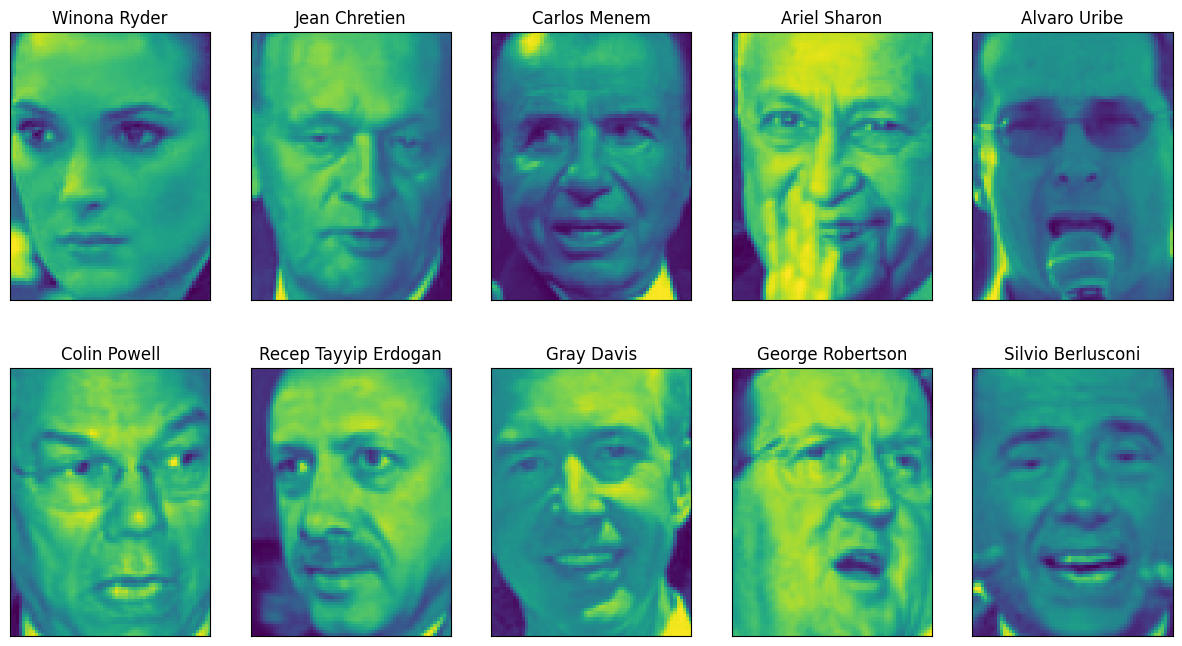

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={"xticks": (), "yticks": ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [22]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [29]:
import numpy as np

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique (people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.22


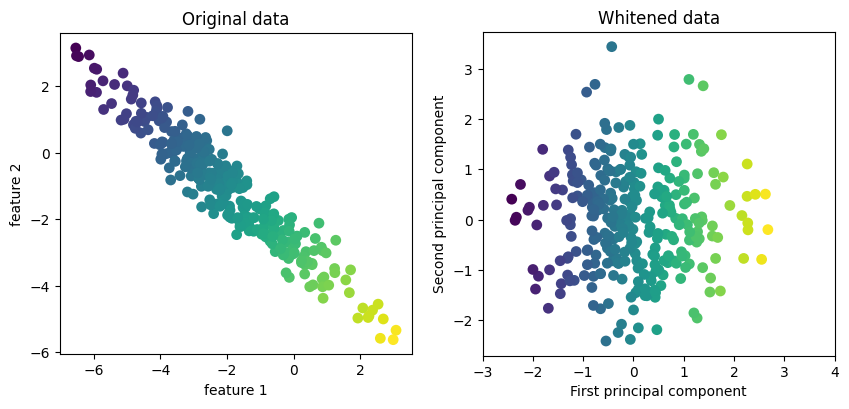

In [31]:
mglearn.plots.plot_pca_whitening()

In [32]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca-shape:", X_train_pca.shape)

X_train_pca-shape: (1547, 100)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test_pca, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.30


pca.components_.shape: (100, 5655)


/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaehunchoi/anac

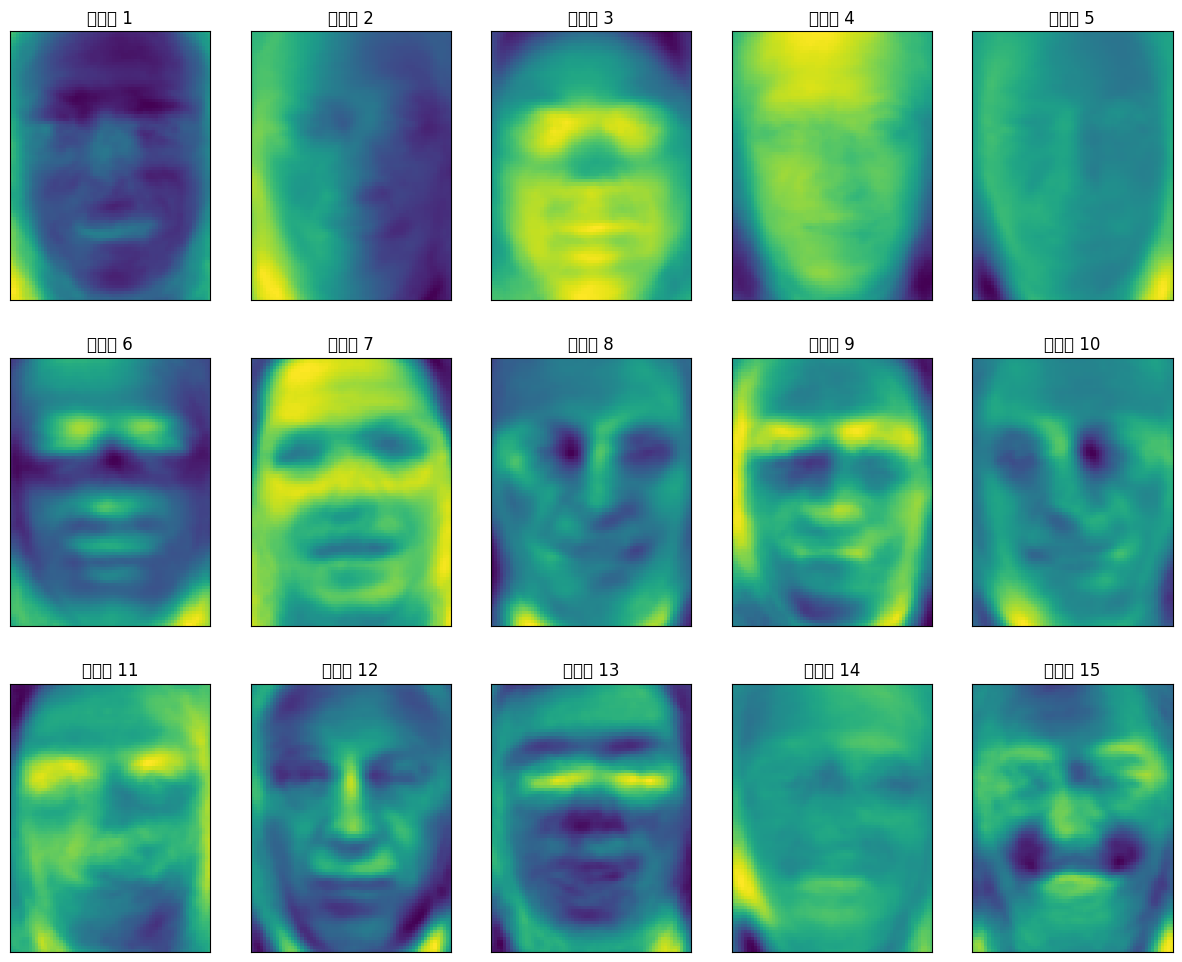

In [37]:
print("pca.components_.shape:", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i+1)))

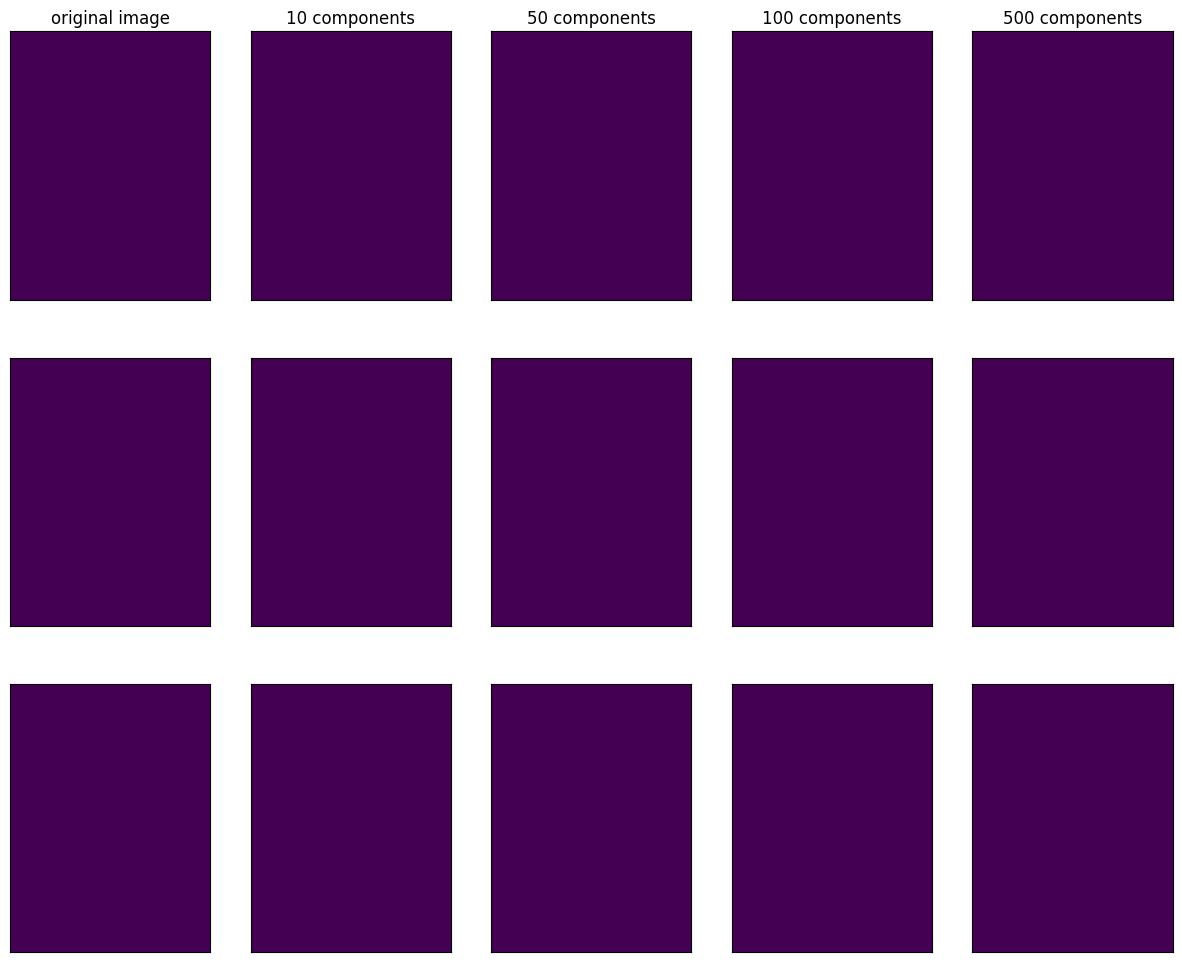

In [39]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


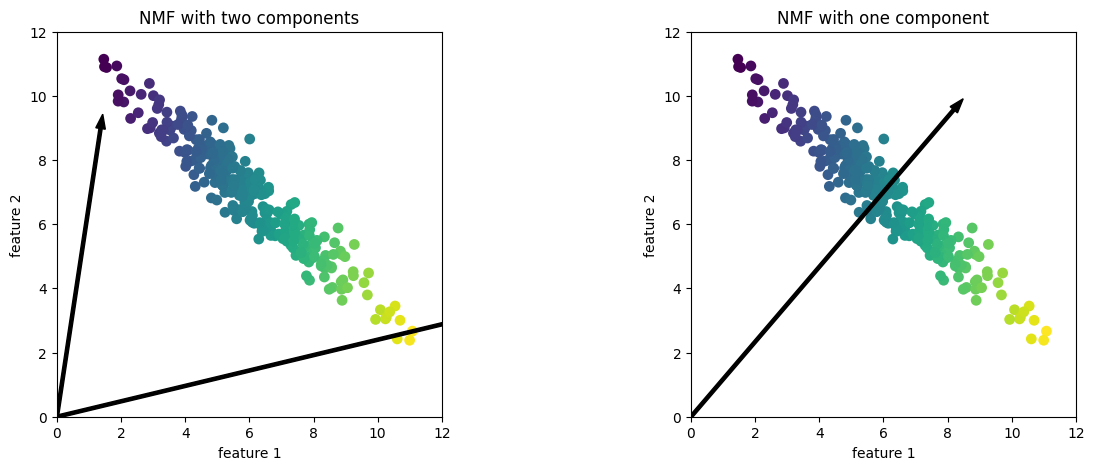

In [40]:
mglearn.plots.plot_nmf_illustration()

In [41]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


KeyboardInterrupt: 

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


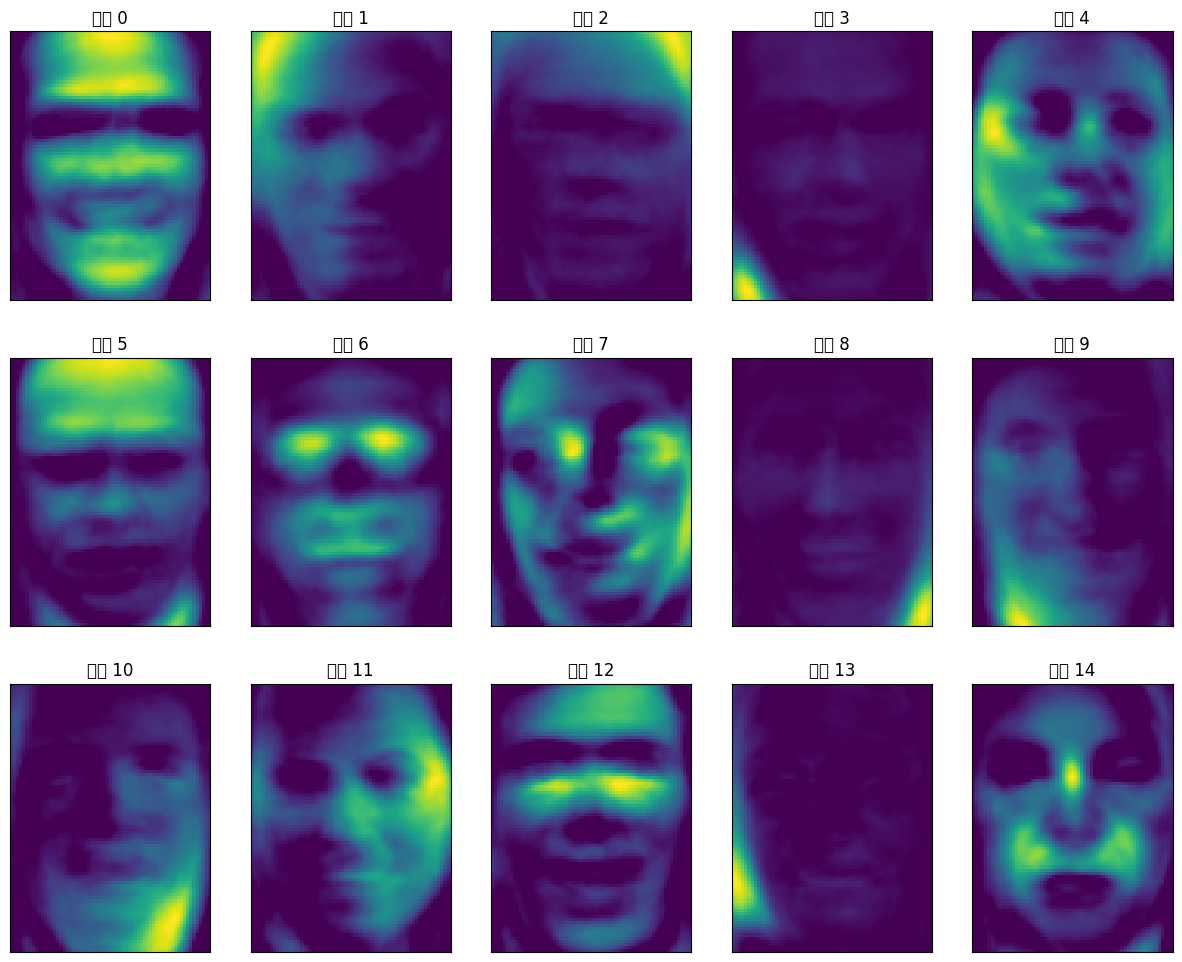

In [48]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init= 'nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax. imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

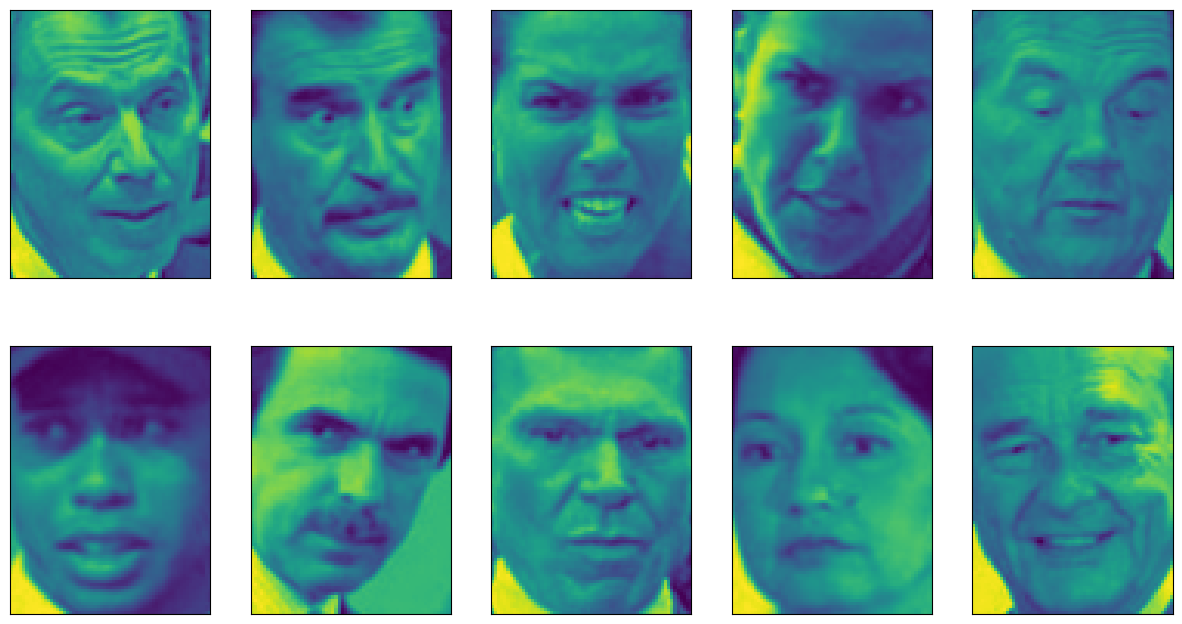

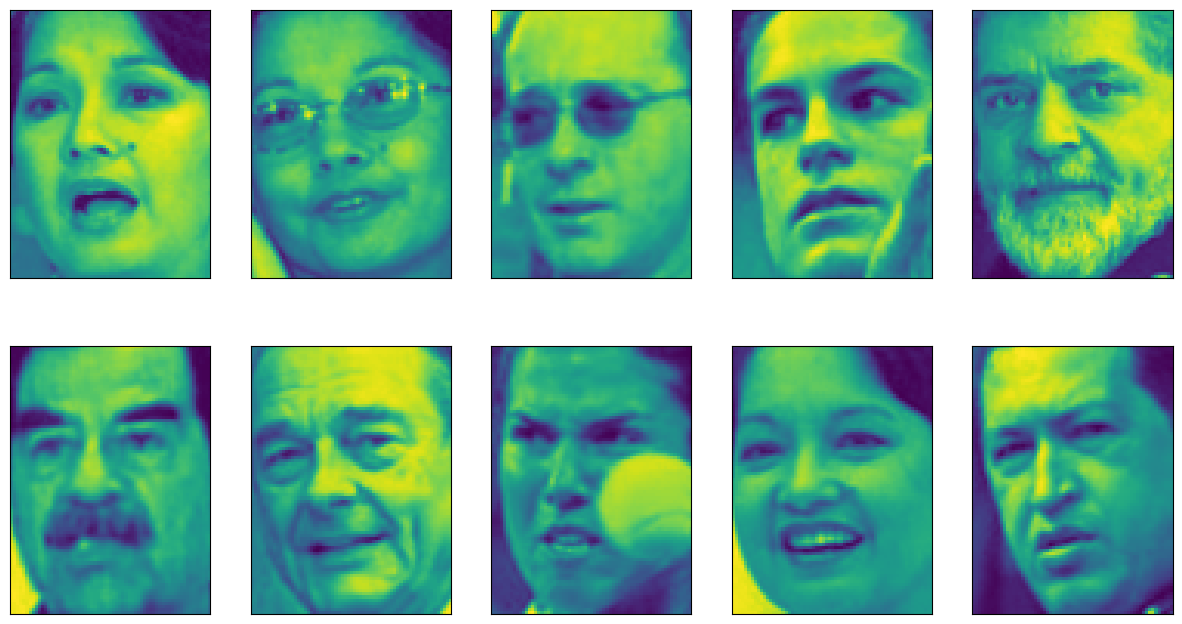

In [49]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={"xticks": (), "yticks": ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={"xticks": (), "yticks": ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
   

Text(0, 0.5, '신호')

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-pa

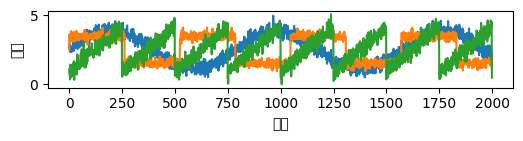

In [51]:
S = mglearn.datasets.make_signals()
plt. figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")

In [52]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정데이터형태:",X.shape)

측정데이터형태: (2000, 100)


In [53]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S.shape)

복원한 신호 데이터 형태: (2000, 3)


In [54]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  func(*args, **kwargs)
/Users/jaehunchoi/anaconda3/lib/python3.10/site-packages/IPython/cor

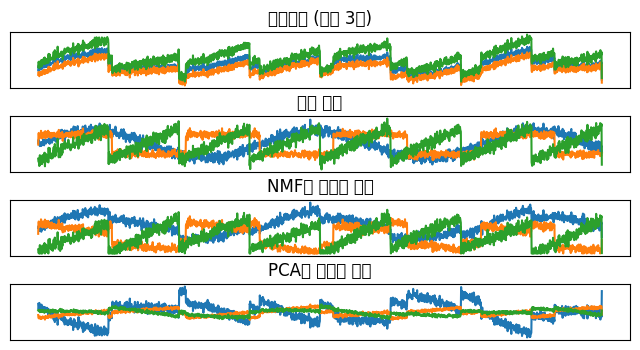

In [55]:
models = [X, S, S_, H]
names = ['측정신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호','PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax. plot(model[:, :3], '-')